#  Gold Price Prediction using Machine Learning

In [6]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.ensemble import RandomForestRegressor  # For regression task
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import streamlit as st
from PIL import Image

In [6]:
gold=pd.read_csv("gld_price_data.csv")
gold

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [7]:
gold.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


## uncovring the data 

In [10]:
gold.shape

(2290, 6)

In [12]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [13]:
#nan value checking 
gold.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [14]:
#statistical summary
gold.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


## correlaton :

In [15]:
correlation=gold.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


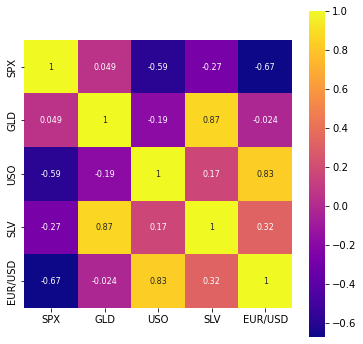

In [18]:
plt.figure(figsize=(6, 6))
sns.heatmap(correlation, cmap="plasma", square=True, annot=True, annot_kws={"size": 8})
plt.show()

In [19]:
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


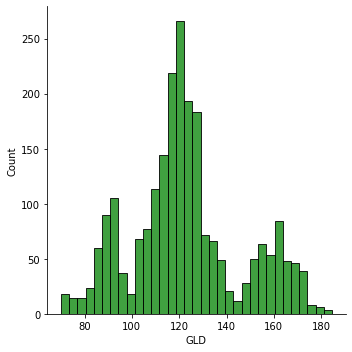

In [20]:
sns.displot(gold["GLD"],color="green")

In [26]:
#splitting the features & target 
X=gold.drop(["Date","GLD"],axis=1)
Y=gold["GLD"]

## Teaining the model

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
reg=RandomForestRegressor()
reg.fit(X_train,Y_train)
pred=reg.predict(X_test)
r2_score(Y_test,pred)

0.9903897974137352

In [31]:
print(pred)

[122.53229934 130.64300265 127.58540016  96.61779738 118.83630065
 114.39299904 124.74700128 117.68599917 107.98230111  98.40189958
  95.44629993 168.06129826 150.74060058 116.53290085 170.48570168
  85.37690026 123.08309867 108.77119702 113.24360084 131.92150271
 124.31579889 113.59840045 115.96960053 108.80419965 108.63520159
 125.76449944 118.47139954 112.38849908 113.68450177 125.5140988
 146.00430194  89.50380038 167.95890016 114.05149957 108.42510102
 120.28290123 141.53839875 161.29930155 174.20349785 153.1977012
 119.1938008  113.04010076 121.49329913 113.77359895 121.98659999
 108.02340075  88.07649889 114.34589928 129.92570196 118.08680149
 103.81120051 129.96310216 107.14409819 160.74000372 131.61210012
 118.15589962 147.40170017 135.72550217  95.65590152 124.63520134
 115.49859875  86.08730069 104.22019906 113.83990053  84.33819957
 122.22250025 116.3502988  113.64410216 165.63790235  92.10140011
  80.34080041 160.86850143 157.7398022  106.29580005 150.1158999
 109.60959762